# Projet 2 Analyse

Projet réalisé par :

<b>
  <ul>
    <li>Papa Ba GAYE</li>
    <li>Ndeye Mareme NGOM</li>
    <li>Cherif Assane Fall MBENGUE</li>
    <li>Mamadou NGOM</li>
    <li>Ibrahima CAMARA</li>
    <li>Abdou Karim SOW</li>
    <li>Chamsidine DIATTA</li>
    <li>Adama CISSE</li>
  </ul>
</b>

**Importation des modules**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import hilbert

1 - Fonction **cramer**

In [23]:
def cramer(matrice, vecteur):
  if matrice.shape[0] == vecteur.shape[1]:
    n = matrice.shape[0]
    Mat = []
    sol = []
    for i in range(n):
      Mat.append(matrice.copy().T)
    
    for i in Mat:
      for j in range(n):
        Mat[j][j] = vecteur
    detP = np.linalg.det(matrice)

    for i in range(len(Mat)):
      sol.append(np.linalg.det(Mat[i]) / detP)
    sol = np.array([sol])
    return sol
  else:
    print('Le nombre de ligne de la matrice A doit etre égale au nombre de colonne deu vecteur b')

In [24]:
# Creation de la matrice de hilbert
matrice_hil = hilbert(5)

vect = np.array([[1]*5])

In [25]:
print('Solution cramer')
print(cramer(matrice_hil, vect))

Solution cramer
[[    5.  -120.   630. -1120.   630.]]


2 - Fonction **decente**

In [26]:
def decente_lu(A, b):
  A = np.tril(A, k=0)
  A[np.diag_indices_from(A)] = 1
  return cramer(A, b)

In [27]:
A = np.array([[3, 2, 1],
              [5, 1, -1],
              [1, -3, 5]])

B = np.array([[1, 6, -4]])

In [28]:
print("Solution decente_lu")
print(decente_lu(A, B))

Solution decente_lu
[[ 1.  1. -2.]]


3 - Fonction **remontee**

In [29]:
def remontee(A, b):
  A = np.triu(A, k=0)
  return cramer(A, b)

In [30]:
print("Solution remontee")
print(remontee(A, B))

Solution remontee
[[-2.86666667  5.2        -0.8       ]]


4 - Fonction **facto_LU**

In [31]:
def facto_LU(A):
  n = A.shape[0]
  U = np.copy(A)
  L = np.eye(n)
  for i in range(n) :
    p = U[i,i]
    for j in range(i+1, n):
      L[j,i] = U[j,i]/p
      U[j] = U[j] - L[j,i] * U[i]
  return L,U

In [32]:
X = np.array([[2., 4., 5., 6.],
              [-1., 2., 8.5, 1.],
              [3., 8., 3., -3.],
              [5., 2., 1.5, 6.4]])

In [33]:
print("Factorisation LU")
Q = facto_LU(X)
print(f'L : \n{Q[0]}')
print('')
print(f'U : \n{Q[1]}')

Factorisation LU
L : 
[[ 1.   0.   0.   0. ]
 [-0.5  1.   0.   0. ]
 [ 1.5  0.5  1.   0. ]
 [ 2.5 -2.  -1.1  1. ]]

U : 
[[  2.   4.   5.   6.]
 [  0.   4.  11.   4.]
 [  0.   0. -10. -14.]
 [  0.   0.   0. -16.]]


In [34]:
# Vérification par le produit matriciel
print("Resultat Verification")
print(Q[0] @ Q[1])

Resultat Verification
[[ 2.   4.   5.   6. ]
 [-1.   2.   8.5  1. ]
 [ 3.   8.   3.  -3. ]
 [ 5.   2.   1.5  6.4]]


5 - **Fonction resol_LU** <br>
Avec la factorisation sous forme LU l'équation Ax = <=> LUx = b.
On pose Ux = y => Ly = b



In [35]:
def resol_LU(A, b):
  LU = facto_LU(A)
  desc = decente_lu(LU[0], b)
  solution = remontee(LU[1], desc)
  return solution


In [36]:
A = np.array([[0.3, 0.52, 1],
              [0.5, 1, 1.9],
              [0.1, 0.3, 0.5]])

B = np.array([[-0.01, 0.67, -0.44]])

In [37]:
print("Solution resol_LU")
print(resol_LU(A, B))

Solution resol_LU
[[-14.9 -29.5  19.8]]


## **Question6** 

In [38]:
tab_error1 = []
for n in range(1,26):
  # print(f"value of n {n}")
  mat = hilbert(n)
  vector = np.array([[1]*n])
  sol1 = cramer(mat,vector)
  error1 = np.linalg.norm(sol1-vector)
  tab_error1.append(error1)
  # print(f"Error with cramer {error1}")

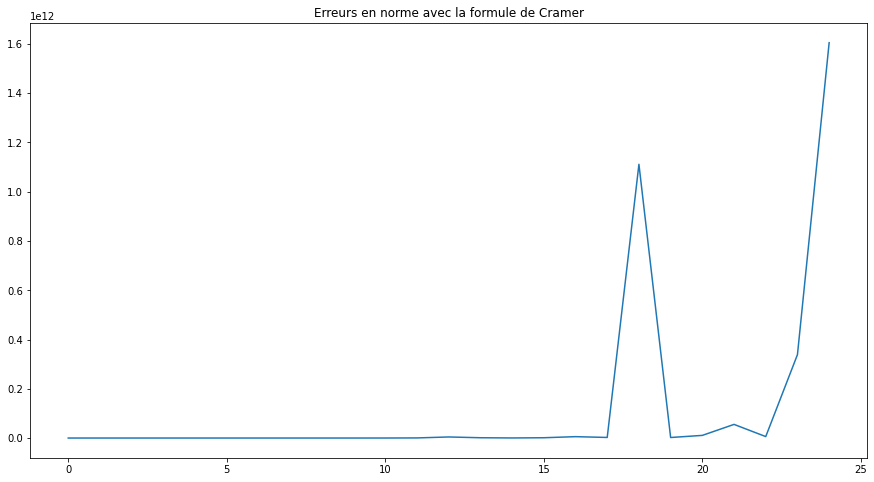

In [39]:
plt.figure(figsize=(15, 8))
plt.plot(tab_error1)
plt.title('Erreurs en norme avec la formule de Cramer')
plt.show()

In [40]:
tab_error2 = []
for n in range(1,26):
  # print(f"value of n {n}")
  mat = hilbert(n)
  vector = np.array([[1]*n])
  sol1 = resol_LU(mat,vector)
  error1 = np.linalg.norm(sol1-vector)
  tab_error2.append(error1)
  # print(f"Error with cramer {error2}")

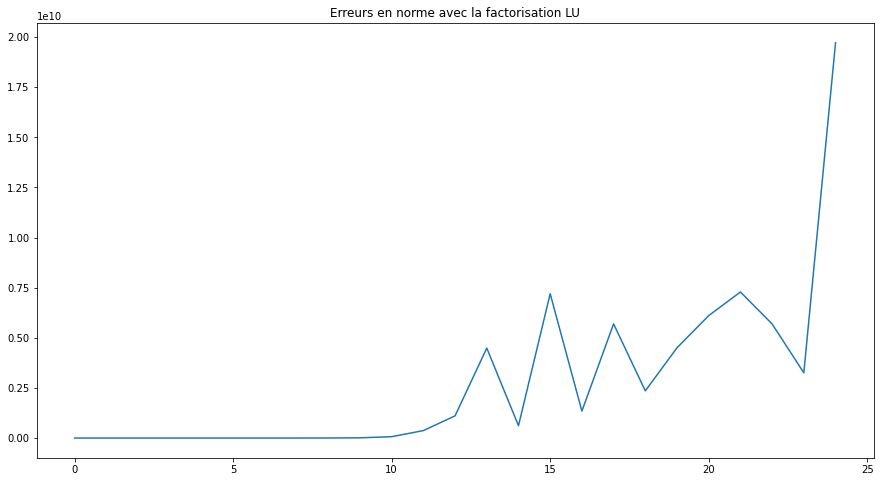

In [41]:
plt.figure(figsize=(15, 8))
plt.plot(tab_error2)
plt.title('Erreurs en norme avec la factorisation LU')
plt.show()